### 🧠 Project Analysis: Does Recruiting Rank Predict Win %?

This section visualizes the relationship between a team's recruiting class ranking and their win percentage two years later.

- The scatter plot shows whether higher-rated classes (rank #1 = best) lead to more wins.
- The regression model statistically estimates how much win percentage changes based on recruiting rank.
- A **negative slope** suggests that better (lower-numbered) recruiting ranks lead to higher win %.
- R² tells us how much of win % variation is explained by recruiting rank.

This helps identify which teams are **developing talent well** (overperforming) or **underachieving** relative to their recruiting rankings.


📈 Regression: Top 10 Recruiting Class Rank → Win % Two Years Later
                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     7.191
Date:                Wed, 07 May 2025   Prob (F-statistic):            0.00875
Time:                        23:33:48   Log-Likelihood:                 38.919
No. Observations:                  90   AIC:                            -73.84
Df Residuals:                      88   BIC:                            -68.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

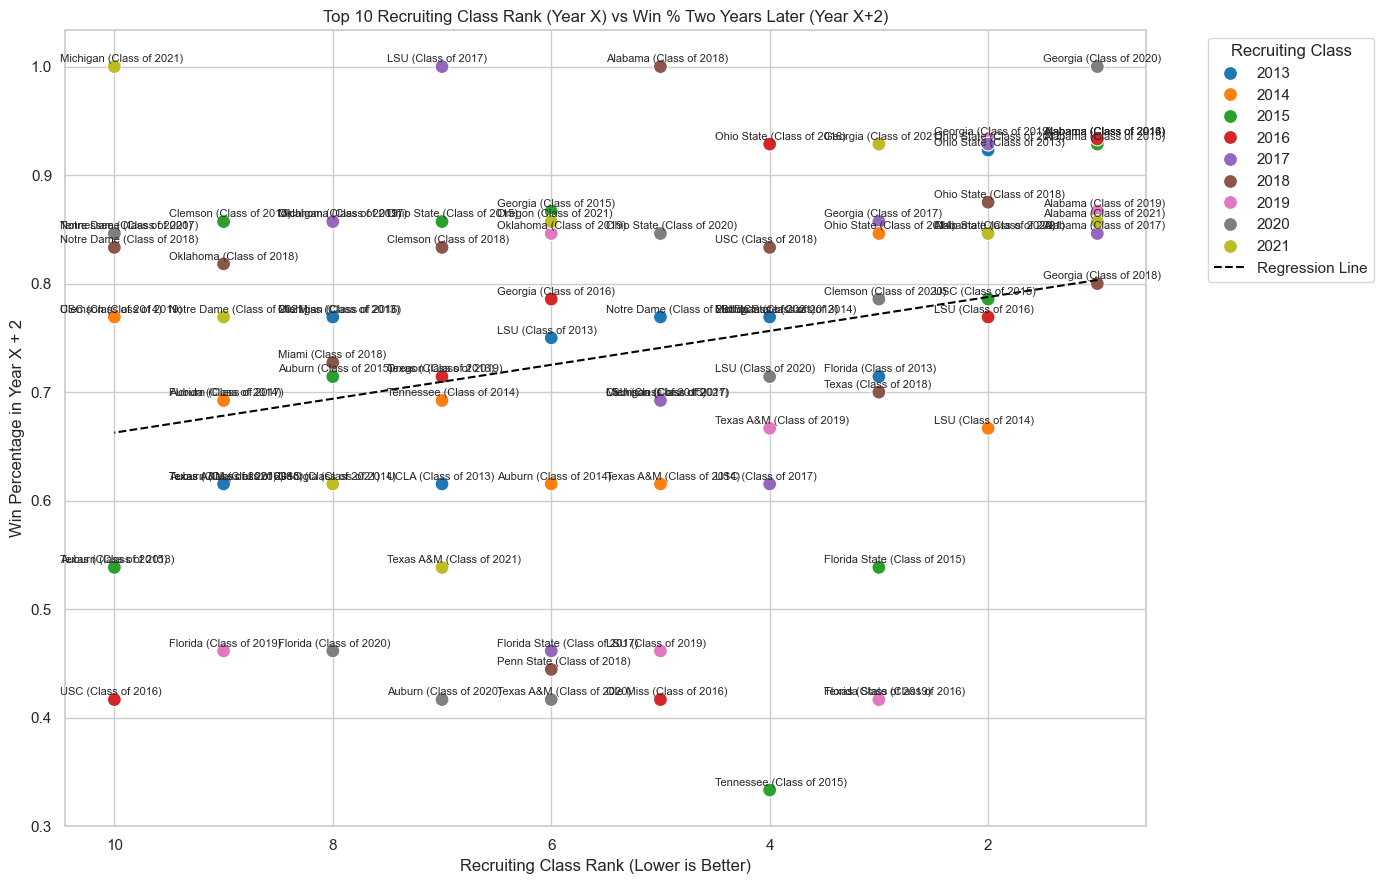

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

recruiting = pd.read_csv("data/recruiting_data.csv")
team_stats = pd.read_csv("data/team_summary.csv")
team_stats["recruiting_class_year"] = team_stats["year"] - 2

#Filter to Top 10 recruiting classes each year
top10 = (
    recruiting.sort_values(by=["year", "rank"])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

# Merge recruiting class with win % two years later
merged = pd.merge(
    team_stats,
    top10,
    left_on=["team", "recruiting_class_year"],
    right_on=["team", "year"],
    how="inner",
    suffixes=("_performance", "_recruiting")
)

# Final dataset, label by recruiting class year, not win year
df = merged[["team", "recruiting_class_year", "year_performance", "rank", "win_pct"]].copy()
df = df.rename(columns={
    "recruiting_class_year": "class_year",
    "year_performance": "win_year"
})
df["label"] = df["team"] + " (Class of " + df["class_year"].astype(str) + ")"

# Regression
X = sm.add_constant(df["rank"])
y = df["win_pct"]
model = sm.OLS(y, X).fit()
print("📈 Regression: Top 10 Recruiting Class Rank → Win % Two Years Later")
print(model.summary())

# Plot: Dots colored by recruiting class year
plt.figure(figsize=(14, 9))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x="rank", y="win_pct", hue="class_year", palette="tab10", s=100)

# Label each dot with the class year
for _, row in df.iterrows():
    plt.text(row["rank"] + 0.5, row["win_pct"] + 0.004, row["label"], fontsize=8)

#Regression line
x_vals = np.linspace(df["rank"].min(), df["rank"].max(), 100)
y_vals = model.predict(sm.add_constant(x_vals))
plt.plot(x_vals, y_vals, color="black", linestyle="--", label="Regression Line")
plt.gca().invert_xaxis()
plt.title("Top 10 Recruiting Class Rank (Year X) vs Win % Two Years Later (Year X+2)")
plt.xlabel("Recruiting Class Rank (Lower is Better)")
plt.ylabel("Win Percentage in Year X + 2")
plt.grid(True)
plt.legend(title="Recruiting Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
